In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader import data as pdr

In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
import yfinance as yfin

In [7]:
yfin.pdr_override()

In [8]:
tech_list = ["AAPL","GOOG","MSFT","AMZN"]

In [9]:
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

In [10]:
for stock in tech_list:   
    
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
GOOG.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-08-05,136.940002,136.940002,136.949997,135.600006,136.028503,11866000
2021-08-06,137.035995,137.035995,137.080048,136.046494,136.294998,13560000
2021-08-09,138.001999,138.001999,138.321503,136.428757,136.949005,12374000
2021-08-10,138.096497,138.096497,138.551498,137.226501,138.079498,16034000
2021-08-11,137.689499,137.689499,138.847748,137.350006,138.283005,15204000


In [12]:
#1.Basic Analysis of Stock Information

In [13]:
AAPL.describe()

,Adj Close,Close,High,Low,Open,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,156.455995,156.790159,158.587619,154.795555,156.585000,8.826824e+07
std,12.431440,12.460964,12.599805,12.326273,12.529388,2.660877e+07
min,130.059998,130.059998,132.389999,129.039993,130.070007,4.100000e+07
25%,146.816246,147.054996,148.705002,145.637501,146.959995,6.947065e+07
50%,154.481461,154.619995,156.195000,152.664993,154.714996,8.325120e+07
75%,166.482895,166.727497,169.727493,165.512501,167.607498,1.008644e+08
max,181.511703,182.009995,182.940002,179.119995,182.630005,1.954327e+08


In [14]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-08-05 to 2022-08-04
Data columns (total 6 columns):
Adj Close    252 non-null float64
Close        252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


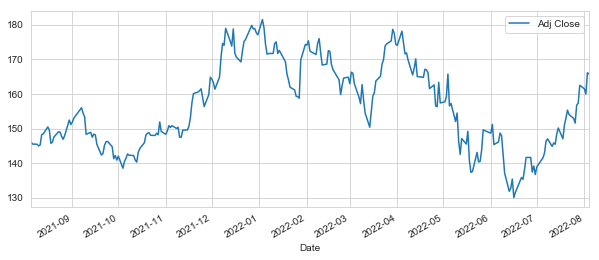

In [15]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

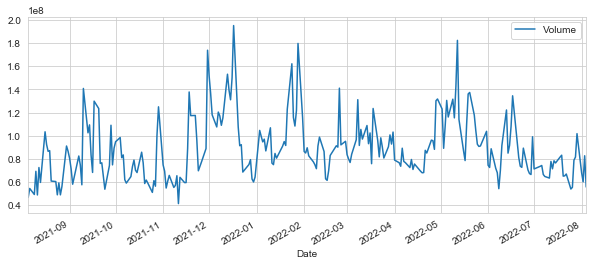

In [16]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [17]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

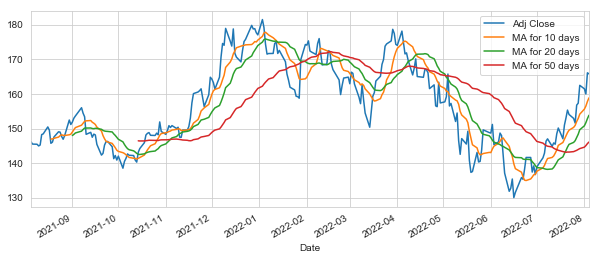

In [18]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [19]:
#2.Daily Return Analysis 

In [20]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

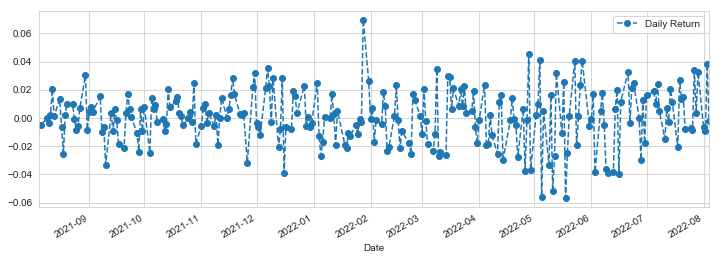

In [21]:
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

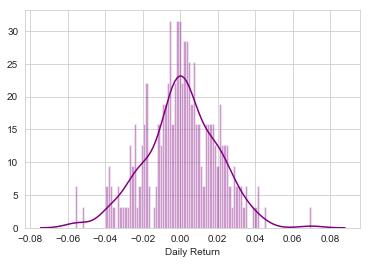

In [22]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

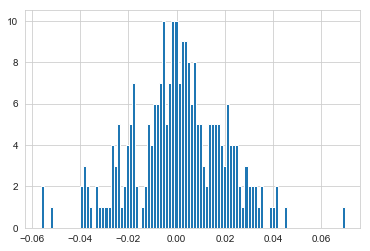

In [23]:
AAPL['Daily Return'].dropna().hist(bins=100)

In [24]:
closing_df = pdr.get_data_yahoo(['AAPL','GOOG','MSFT','AMZN'],start,end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [25]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-08-05,146.224579,168.799500,136.940002,287.175018
2021-08-06,145.527512,167.246994,137.035995,287.115540
2021-08-09,145.477722,167.093506,138.001999,285.994659
2021-08-10,144.989792,166.033997,138.096497,284.119995
2021-08-11,145.248703,164.605499,137.689499,284.625916


In [26]:
tech_rets = closing_df.pct_change()

In [27]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-08-05,NaN,NaN,NaN,NaN
2021-08-06,-0.004767,-0.009197,0.000701,-0.000207
2021-08-09,-0.000342,-0.000918,0.007049,-0.003904
2021-08-10,-0.003354,-0.006341,0.000685,-0.006555
2021-08-11,0.001786,-0.008604,-0.002947,0.001781


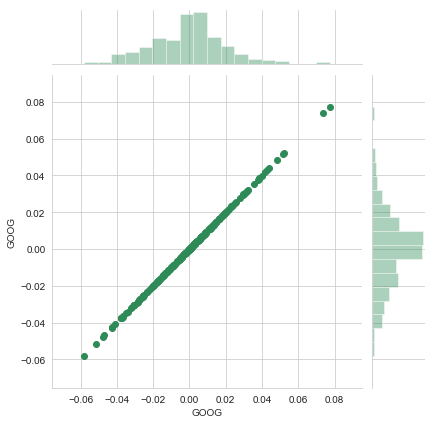

In [28]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

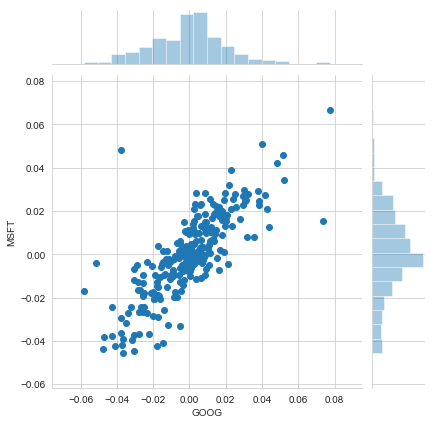

In [29]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

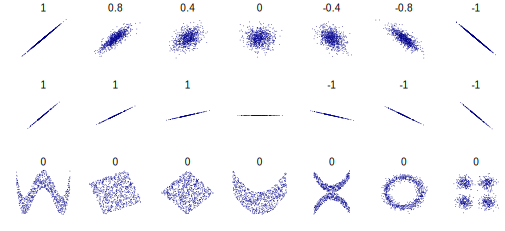

In [30]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

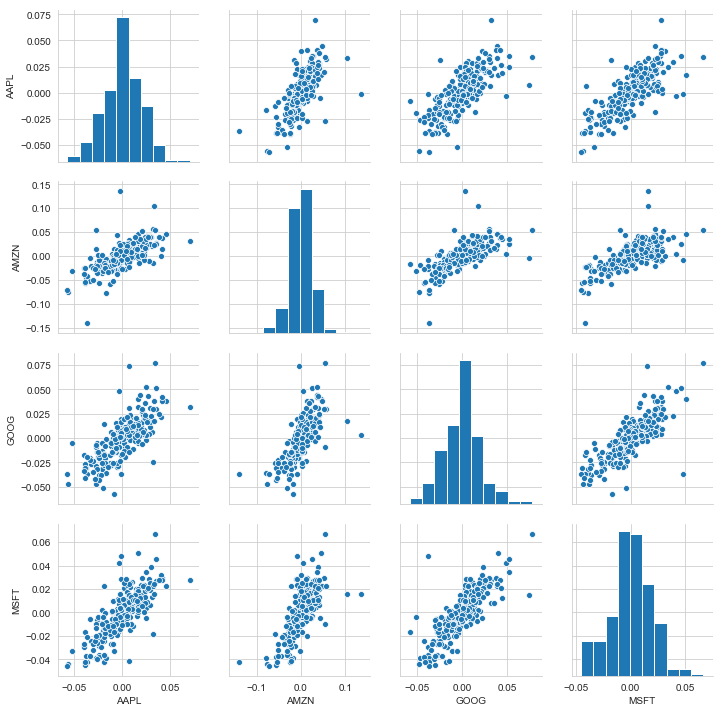

In [31]:
sns.pairplot(tech_rets.dropna())

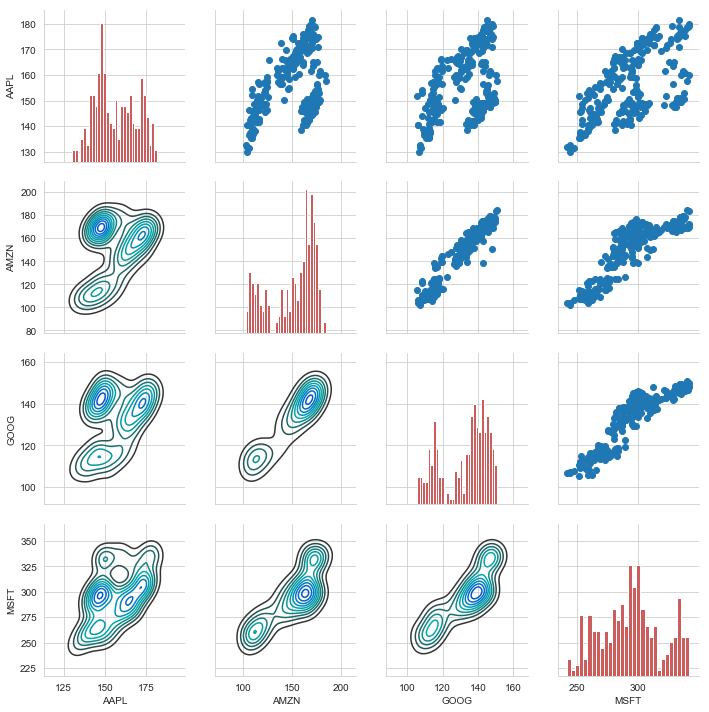

In [32]:
returns_fig = sns.PairGrid(closing_df)
#upper triangle
returns_fig.map_upper(plt.scatter)
#lower triangle
returns_fig.map_lower(sns.kdeplot,cmap='winter_d')
#diagonal
returns_fig.map_diag(plt.hist,bins=30,color='indianred')


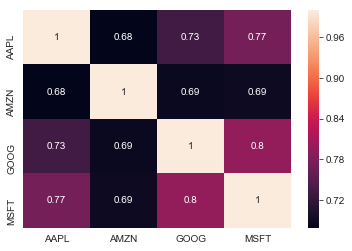

In [33]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

In [34]:
#3 Risk Analysis

In [35]:
rets = tech_rets.dropna()

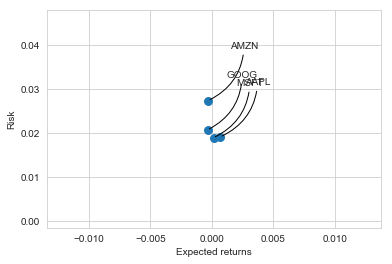

In [36]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s =area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', color='black', connectionstyle = 'arc3, rad= -.3'))

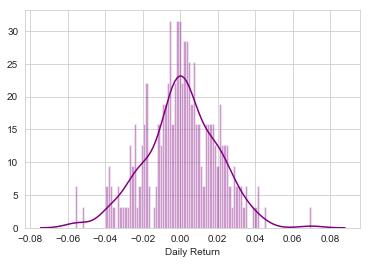

In [37]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [38]:
rets['AAPL'].quantile(0.05)

-0.03239020855860997

In [39]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [41]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [42]:
GOOG.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-08-05,136.940002,136.940002,136.949997,135.600006,136.028503,11866000
2021-08-06,137.035995,137.035995,137.080048,136.046494,136.294998,13560000
2021-08-09,138.001999,138.001999,138.321503,136.428757,136.949005,12374000
2021-08-10,138.096497,138.096497,138.551498,137.226501,138.079498,16034000
2021-08-11,137.689499,137.689499,138.847748,137.350006,138.283005,15204000


Text(0.5,1,'Monte Carlo Analysis for Google')

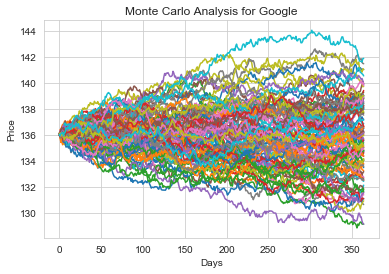

In [43]:
start_price = 136.03

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [44]:
runs = 10000

simulations = np.zeros(runs)

np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

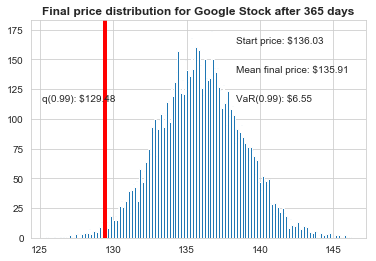

In [45]:
q = np.percentile(simulations, 1)
    
plt.hist(simulations,bins=200)


plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');